# デシル分析

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# 要素数のカウント
def count_data(data):
    count = data.value_counts().tolist()
    label = data.value_counts().index.tolist()
    return count, label

# プロットする際に要素数も表示
def pct_abs(pct, data, rate):
    absolute = int(round((np.sum(data)*(pct/100.)))) # round()を噛ませないとずれる
    return '{:d}\n({:.1f}%)'.format(absolute, pct) if pct > rate else ''

# 構成比のプロット
def plot_result_ratio(data, label, rate, title):
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size':10})
    plt.figure(figsize=(8,6), dpi=100)
    plt.title(title)
    plt.pie(x=data, startangle=90, counterclock=False, autopct=lambda p:pct_abs(p, data, rate), pctdistance=0.75)
    plt.axis('equal')
    plt.legend(label, fancybox=True, loc='best', bbox_to_anchor=(0.9, 0.9))
    plt.show()

## 全体

In [2]:
df = pd.read_csv('./customer_dataset_decile.csv')
df

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,unique_payment,unique_category,sum_price,decile
0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,credit_card,fixed_telephony,13440.00,1
1,da122df9eeddfedc1dc1f5349a1a690c,28970,araruama,RJ,credit_card,small_appliances,7388.00,1
2,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,boleto,fixed_telephony,7160.00,1
3,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,credit_card,housewares,6735.00,1
4,459bef486812aa25204be022145caa62,29066,vitoria,ES,boleto,computers,6729.00,1
...,...,...,...,...,...,...,...,...
95669,cf3839da0d9492ad151690b65f45d800,6604,jandira,SP,credit_card,stationery,2.99,10
95670,bd06ce0e06ad77a7f681f1a4960a3cc6,4814,sao paulo,SP,credit_card,stationery,2.29,10
95671,317cfc692e3f86c45c95697c61c853a6,13140,paulinia,SP,credit_card,health_beauty,2.20,10
95672,b38211bd797f4fdd81a98b9d1754b606,25215,duque de caxias,RJ,credit_card,construction_tools_construction,0.85,10


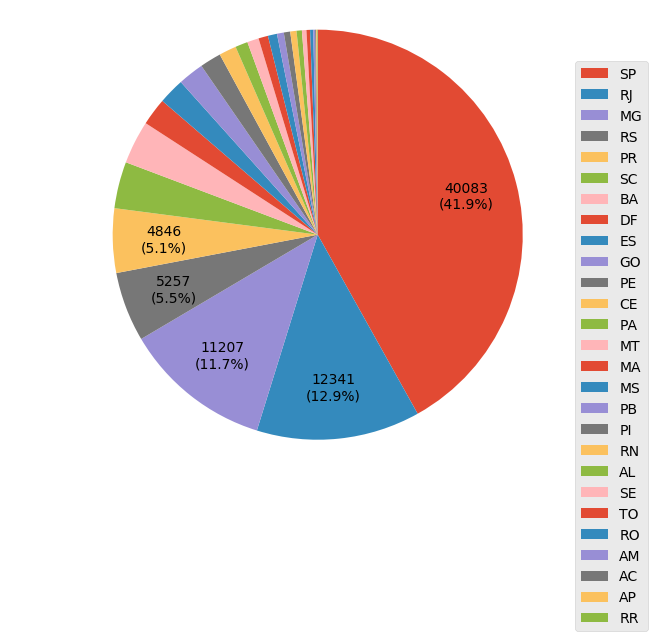

['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'DF', 'ES', 'GO', 'PE', 'CE', 'PA', 'MT', 'MA', 'MS', 'PB', 'PI', 'RN', 'AL', 'SE', 'TO', 'RO', 'AM', 'AC', 'AP', 'RR']
[40083, 12341, 11207, 5257, 4846, 3518, 3261, 2066, 1963, 1945, 1606, 1306, 945, 873, 720, 688, 516, 482, 472, 401, 339, 272, 235, 143, 77, 67, 45]


In [3]:
# 州
plat_cnt, plat_label= count_data(df.customer_state)
plot_result_ratio(plat_cnt, plat_label, 5, '')
print(plat_label)
print(plat_cnt)

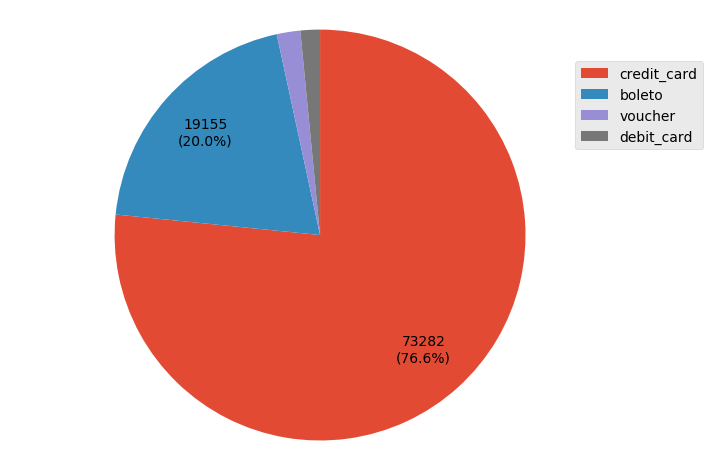

['credit_card', 'boleto', 'voucher', 'debit_card']
[73282, 19155, 1771, 1466]


In [4]:
# 支払い方法
plat_cnt, plat_label= count_data(df.unique_payment)
plot_result_ratio(plat_cnt, plat_label, 5, '')
print(plat_label)
print(plat_cnt)

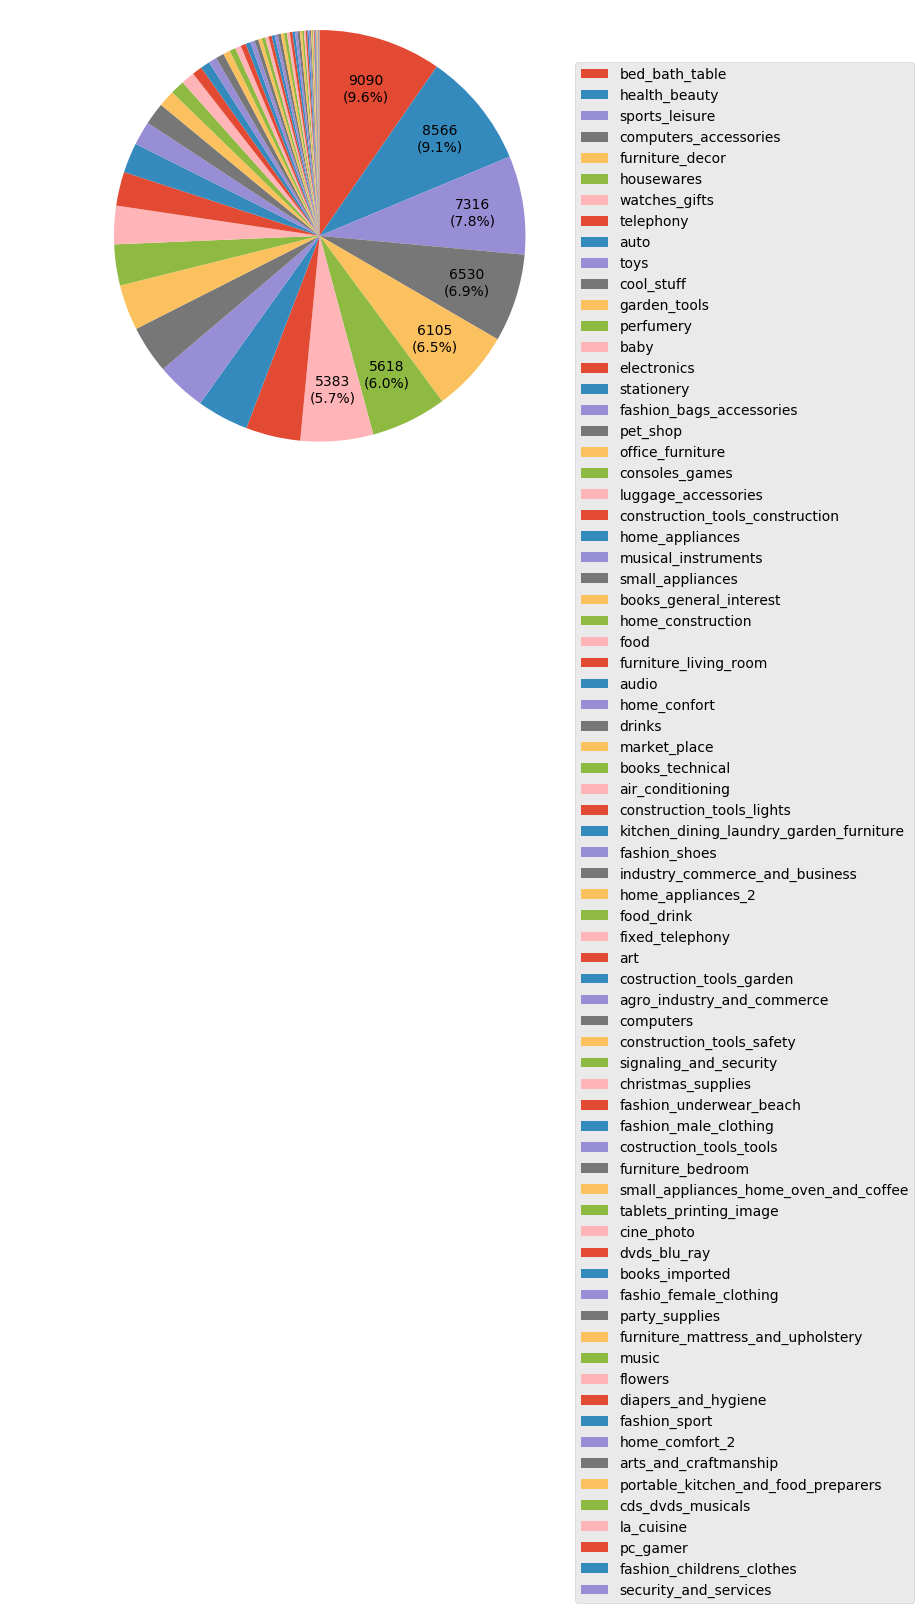

['bed_bath_table', 'health_beauty', 'sports_leisure', 'computers_accessories', 'furniture_decor', 'housewares', 'watches_gifts', 'telephony', 'auto', 'toys', 'cool_stuff', 'garden_tools', 'perfumery', 'baby', 'electronics', 'stationery', 'fashion_bags_accessories', 'pet_shop', 'office_furniture', 'consoles_games', 'luggage_accessories', 'construction_tools_construction', 'home_appliances', 'musical_instruments', 'small_appliances', 'books_general_interest', 'home_construction', 'food', 'furniture_living_room', 'audio', 'home_confort', 'drinks', 'market_place', 'books_technical', 'air_conditioning', 'construction_tools_lights', 'kitchen_dining_laundry_garden_furniture', 'fashion_shoes', 'industry_commerce_and_business', 'home_appliances_2', 'food_drink', 'fixed_telephony', 'art', 'costruction_tools_garden', 'agro_industry_and_commerce', 'computers', 'construction_tools_safety', 'signaling_and_security', 'christmas_supplies', 'fashion_underwear_beach', 'fashion_male_clothing', 'costructi

In [5]:
# カテゴリ
plat_cnt, plat_label= count_data(df.unique_category)
plot_result_ratio(plat_cnt, plat_label, 5, '')
print(plat_label)
print(plat_cnt)

## デシル：１

In [6]:
df = pd.read_csv('./customer_dataset_decile.csv')
df = df[df['decile'] == 1]

df

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,unique_payment,unique_category,sum_price,decile
0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,credit_card,fixed_telephony,13440.0,1
1,da122df9eeddfedc1dc1f5349a1a690c,28970,araruama,RJ,credit_card,small_appliances,7388.0,1
2,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,boleto,fixed_telephony,7160.0,1
3,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,credit_card,housewares,6735.0,1
4,459bef486812aa25204be022145caa62,29066,vitoria,ES,boleto,computers,6729.0,1
...,...,...,...,...,...,...,...,...
7421,f2bcc6ad1bb400ff8d1ed1b570f01348,17490,piratininga,SP,credit_card,health_beauty,330.0,1
7422,f37df26d81056b8d7ac3efba580ab962,65067,sao luis,MA,credit_card,health_beauty,330.0,1
7423,f4371991881a328886a134bbc99cec9e,79332,corumba,MS,credit_card,watches_gifts,330.0,1
7424,f68ec6805b80a4aa7416a2bf1e84ab44,59380,currais novos,RN,boleto,health_beauty,330.0,1


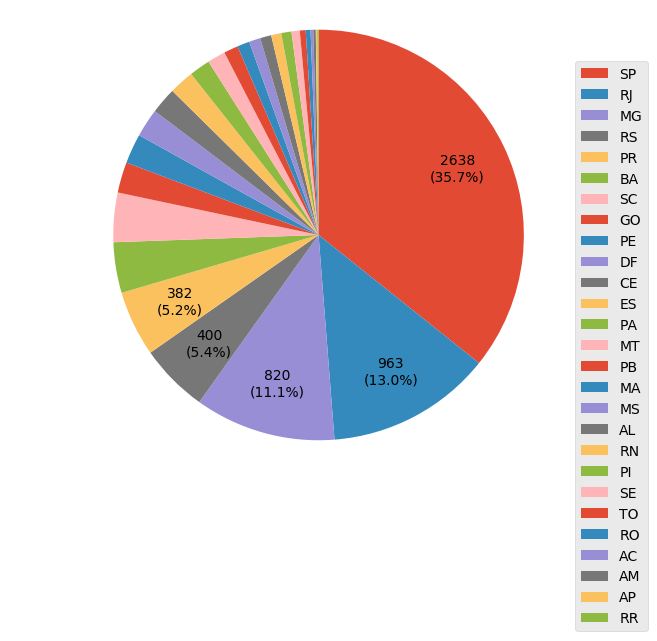

['SP', 'RJ', 'MG', 'RS', 'PR', 'BA', 'SC', 'GO', 'PE', 'DF', 'CE', 'ES', 'PA', 'MT', 'PB', 'MA', 'MS', 'AL', 'RN', 'PI', 'SE', 'TO', 'RO', 'AC', 'AM', 'AP', 'RR']
[2638, 963, 820, 400, 382, 294, 287, 178, 173, 165, 153, 145, 122, 105, 83, 72, 66, 65, 59, 59, 48, 34, 28, 16, 14, 9, 7]


In [7]:
# 州
plat_cnt, plat_label= count_data(df.customer_state)
plot_result_ratio(plat_cnt, plat_label, 5, '')
print(plat_label)
print(plat_cnt)

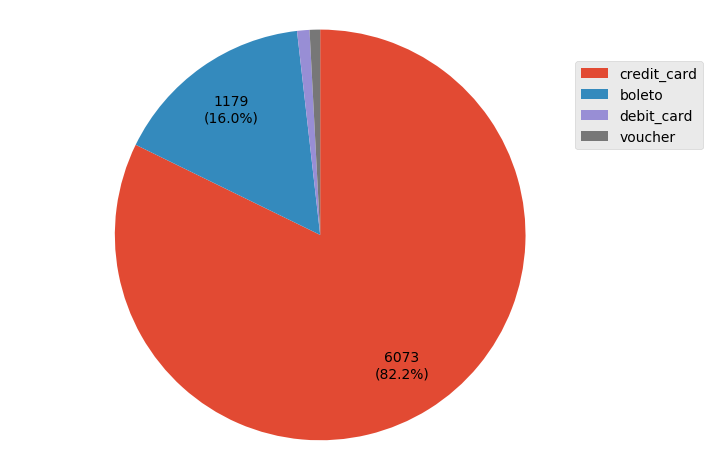

['credit_card', 'boleto', 'debit_card', 'voucher']
[6073, 1179, 72, 61]


In [8]:
# 支払い方法
plat_cnt, plat_label= count_data(df.unique_payment)
plot_result_ratio(plat_cnt, plat_label, 5, '')
print(plat_label)
print(plat_cnt)

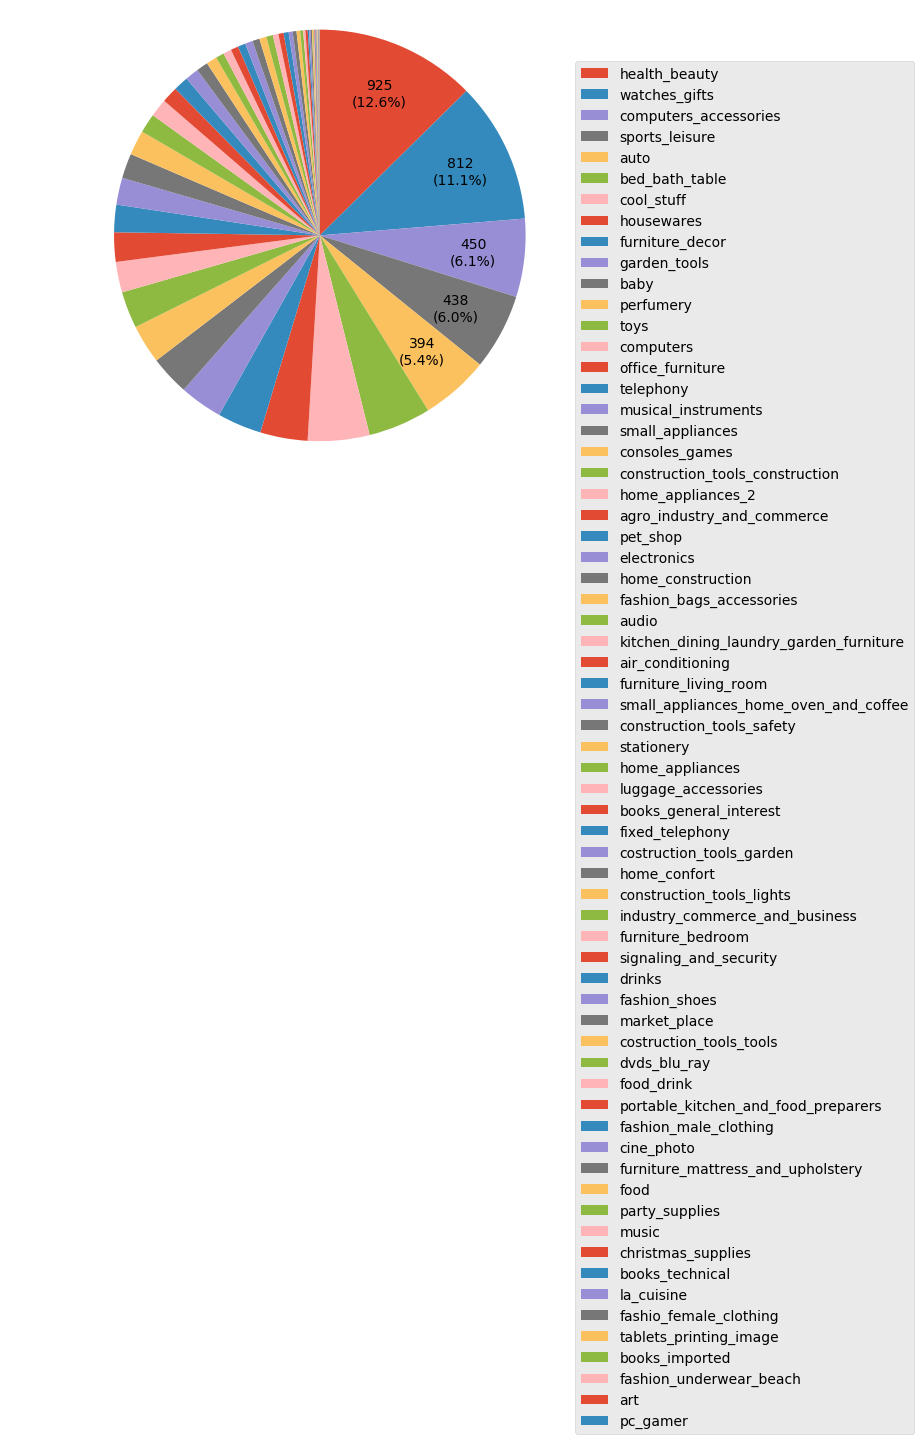

['health_beauty', 'watches_gifts', 'computers_accessories', 'sports_leisure', 'auto', 'bed_bath_table', 'cool_stuff', 'housewares', 'furniture_decor', 'garden_tools', 'baby', 'perfumery', 'toys', 'computers', 'office_furniture', 'telephony', 'musical_instruments', 'small_appliances', 'consoles_games', 'construction_tools_construction', 'home_appliances_2', 'agro_industry_and_commerce', 'pet_shop', 'electronics', 'home_construction', 'fashion_bags_accessories', 'audio', 'kitchen_dining_laundry_garden_furniture', 'air_conditioning', 'furniture_living_room', 'small_appliances_home_oven_and_coffee', 'construction_tools_safety', 'stationery', 'home_appliances', 'luggage_accessories', 'books_general_interest', 'fixed_telephony', 'costruction_tools_garden', 'home_confort', 'construction_tools_lights', 'industry_commerce_and_business', 'furniture_bedroom', 'signaling_and_security', 'drinks', 'fashion_shoes', 'market_place', 'costruction_tools_tools', 'dvds_blu_ray', 'food_drink', 'portable_kit

In [9]:
# カテゴリ
plat_cnt, plat_label= count_data(df.unique_category)
plot_result_ratio(plat_cnt, plat_label, 5, '')
print(plat_label)
print(plat_cnt)

## デシル：１０

In [10]:
df = pd.read_csv('./customer_dataset_decile.csv')
df = df[df['decile'] == 10]

df

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,unique_payment,unique_category,sum_price,decile
84732,01f163c912209bc42fd9c0e169e8039e,91780,porto alegre,RS,credit_card,computers_accessories,28.00,10
84733,06374ae87d5b7dd95b9528c9c6eda663,13830,santo antonio de posse,SP,debit_card,auto,28.00,10
84734,0740a75b566002a3d0c0f6c984f85d58,13210,jundiai,SP,credit_card,baby,28.00,10
84735,07e0e472a351d2ea0a1130ecc7c2d2e4,30775,belo horizonte,MG,boleto,pet_shop,28.00,10
84736,086d34d6252f06ace8593f7fa51bacd8,4370,sao paulo,SP,credit_card,baby,28.00,10
...,...,...,...,...,...,...,...,...
95669,cf3839da0d9492ad151690b65f45d800,6604,jandira,SP,credit_card,stationery,2.99,10
95670,bd06ce0e06ad77a7f681f1a4960a3cc6,4814,sao paulo,SP,credit_card,stationery,2.29,10
95671,317cfc692e3f86c45c95697c61c853a6,13140,paulinia,SP,credit_card,health_beauty,2.20,10
95672,b38211bd797f4fdd81a98b9d1754b606,25215,duque de caxias,RJ,credit_card,construction_tools_construction,0.85,10


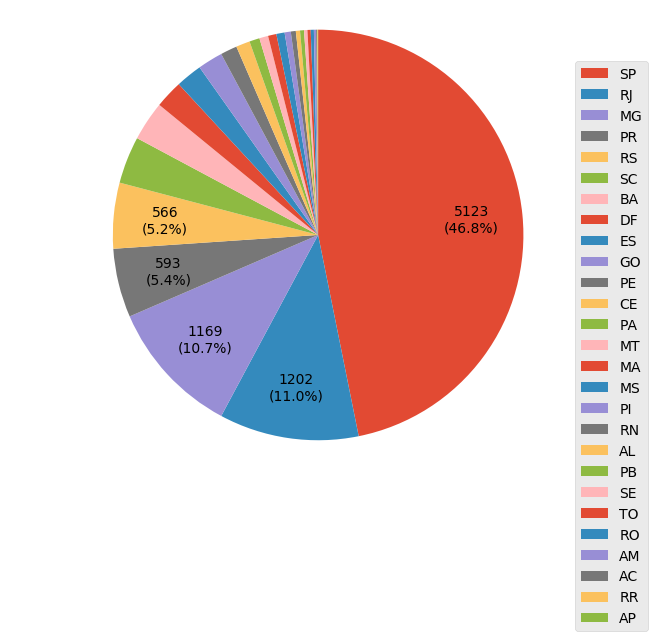

['SP', 'RJ', 'MG', 'PR', 'RS', 'SC', 'BA', 'DF', 'ES', 'GO', 'PE', 'CE', 'PA', 'MT', 'MA', 'MS', 'PI', 'RN', 'AL', 'PB', 'SE', 'TO', 'RO', 'AM', 'AC', 'RR', 'AP']
[5123, 1202, 1169, 593, 566, 406, 340, 241, 227, 216, 143, 120, 88, 76, 72, 71, 53, 43, 36, 34, 29, 28, 27, 19, 8, 6, 3]


In [11]:
# 州
plat_cnt, plat_label= count_data(df.customer_state)
plot_result_ratio(plat_cnt, plat_label, 5, '')
print(plat_label)
print(plat_cnt)

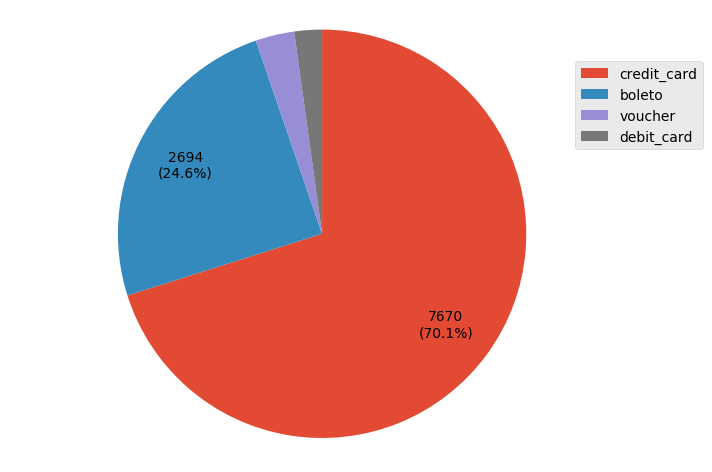

['credit_card', 'boleto', 'voucher', 'debit_card']
[7670, 2694, 336, 239]


In [12]:
# 支払い方法
plat_cnt, plat_label= count_data(df.unique_payment)
plot_result_ratio(plat_cnt, plat_label, 5, '')
print(plat_label)
print(plat_cnt)

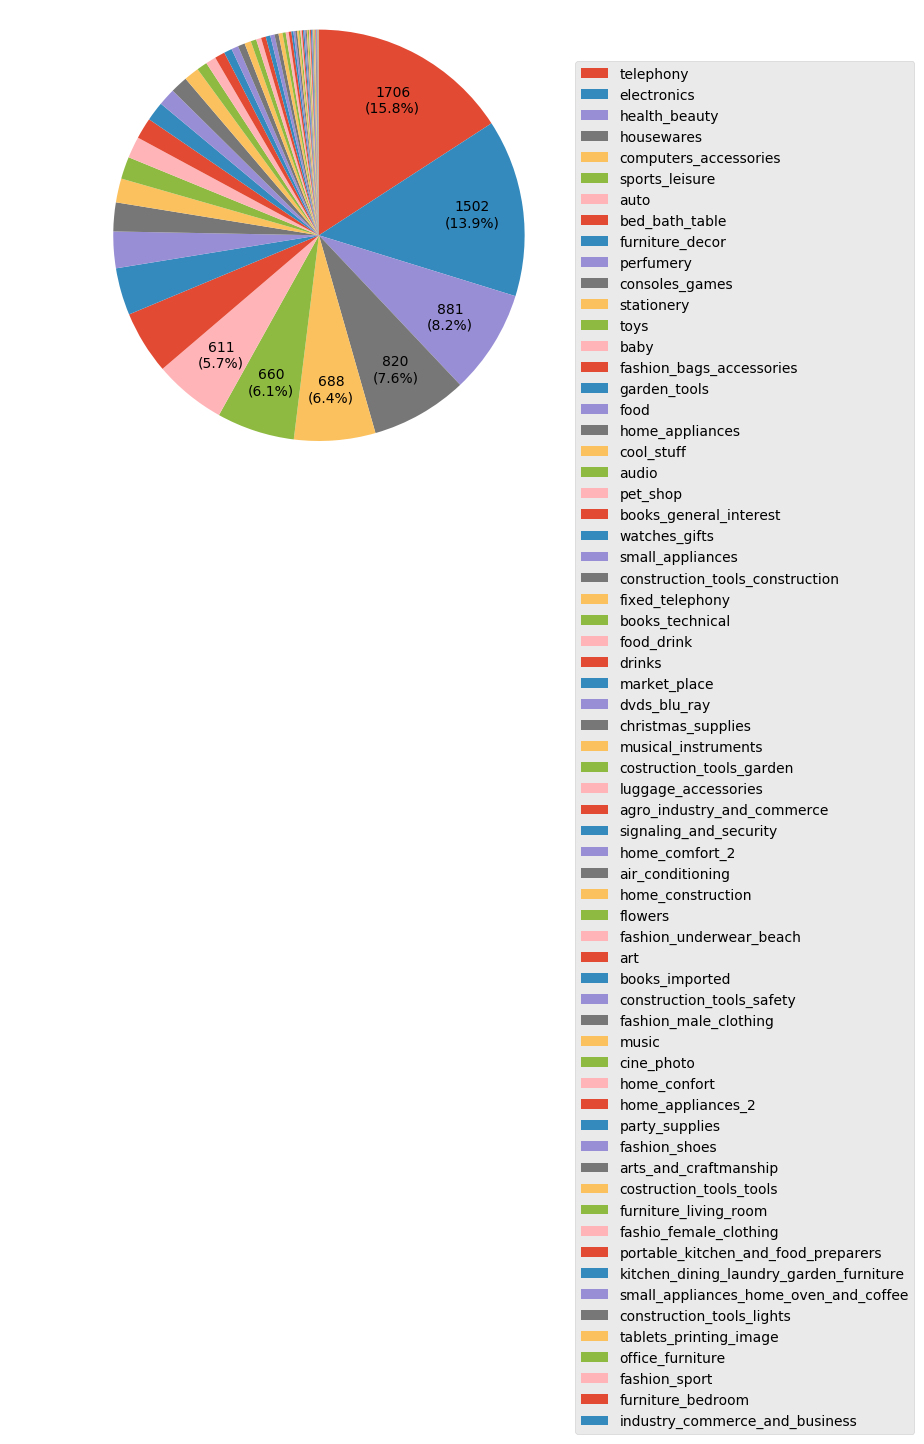

['telephony', 'electronics', 'health_beauty', 'housewares', 'computers_accessories', 'sports_leisure', 'auto', 'bed_bath_table', 'furniture_decor', 'perfumery', 'consoles_games', 'stationery', 'toys', 'baby', 'fashion_bags_accessories', 'garden_tools', 'food', 'home_appliances', 'cool_stuff', 'audio', 'pet_shop', 'books_general_interest', 'watches_gifts', 'small_appliances', 'construction_tools_construction', 'fixed_telephony', 'books_technical', 'food_drink', 'drinks', 'market_place', 'dvds_blu_ray', 'christmas_supplies', 'musical_instruments', 'costruction_tools_garden', 'luggage_accessories', 'agro_industry_and_commerce', 'signaling_and_security', 'home_comfort_2', 'air_conditioning', 'home_construction', 'flowers', 'fashion_underwear_beach', 'art', 'books_imported', 'construction_tools_safety', 'fashion_male_clothing', 'music', 'cine_photo', 'home_confort', 'home_appliances_2', 'party_supplies', 'fashion_shoes', 'arts_and_craftmanship', 'costruction_tools_tools', 'furniture_living_

In [13]:
# カテゴリ
plat_cnt, plat_label= count_data(df.unique_category)
plot_result_ratio(plat_cnt, plat_label, 5, '')
print(plat_label)
print(plat_cnt)